# Overview


## Imports

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.30f}'.format
from Predicting_Purchase_Intention.utils.clean_data import drop_cols
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of Predicting_Purchase_Intention.utils.clean_data failed: Traceback (most recent call last):
  File "/home/jamie/.pyenv/versions/lewagon/envs/project_lewagon_PPI/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/jamie/.pyenv/versions/lewagon/envs/project_lewagon_PPI/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/jamie/.pyenv/versions/3.8.12/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 839, in exec_module
  File "<frozen importlib._bootstrap_external>", line 976, in get_code
  File "<frozen importlib._bootstrap_external>", line 906, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/jami

## Load Data

In [5]:
df1 = pd.read_csv('../data/20201101.csv')
df2 = pd.read_csv('../data/20201102.csv')
df3 = pd.read_csv('../data/20201103.csv')

df = drop_cols(pd.concat([df1,df2,df3]))

df.head()

/tmp/ipykernel_20596/2893324936.py:1: DtypeWarning: Columns (71,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('../data/20201101.csv')
/tmp/ipykernel_20596/2893324936.py:2: DtypeWarning: Columns (82,83,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../data/20201102.csv')
/tmp/ipykernel_20596/2893324936.py:3: DtypeWarning: Columns (80,82,83,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('../data/20201103.csv')


,event_date,event_timestamp,event_name,user_pseudo_id,user_first_touch_timestamp,event_params_page_title,event_params_ga_session_number,event_params_engaged_session_event,event_params_session_engaged,event_params_ga_session_id,user_ltv_revenue,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,ecommerce_total_item_quantity,ecommerce_unique_items,event_params_engagement_time_msec,event_params_source,event_params_medium,event_params_outbound,event_params_link_domain,event_params_value
0,20201101,1604192073036492,page_view,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20201101,1604192073036492,first_visit,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20201101,1604192082302672,user_engagement,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,9215.000000000000000000000000000000,NaN,NaN,NaN,NaN,NaN
3,20201101,1604192073036492,session_start,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,NaN,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20201101,1604202750089608,user_engagement,1013442.500038762344047427177429199219,1604202743751333.000000000000000000000000000000,Home,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,1129172264.000000000000000000000000000000,0.000000000000000000000000000000,mobile,Samsung,<Other>,Android,en-us,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct),NaN,NaN,6268.000000000000000000000000000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['event_date', 'event_timestamp', 'event_name', 'user_pseudo_id', 'user_first_touch_timestamp', 'event_params_page_title', 'event_params_ga_session_number', 'event_params_engaged_session_event', 'event_params_session_engaged', 'event_params_ga_session_id', 'user_ltv_revenue', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_language', 'device_web_info_browser', 'geo_continent', 'geo_sub_continent', 'geo_country', 'geo_region', 'geo_city', 'traffic_source_medium', 'traffic_source_source', 'ecommerce_total_item_quantity', 'ecommerce_unique_items', 'event_params_engagement_time_msec', 'event_params_source', 'event_params_medium', 'event_params_outbound', 'event_params_link_domain', 'event_params_value'], dtype='object')

: 

In [262]:
df['target'] = (df['event_params_value'] > 0) * 1

In [263]:
purchasers = df[df['target'] == 1]['user_pseudo_id']
num_purchasers = len(purchasers)
num_non_purchasers = df['user_pseudo_id'].nunique() - num_purchasers

In [264]:
for purchaser in purchasers:
    for index, row in df[df['user_pseudo_id'] == purchaser].iterrows():
        df.loc[index,'target'] = 1

In [265]:
df_purchasers = df[df['target'] == 1].copy()
df_non_purchasers = df[df['target'] == 0].copy()

## Initial Analysis

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141332 entries, 0 to 61671
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   event_date                          141332 non-null  int64  
 1   event_timestamp                     141332 non-null  int64  
 2   event_name                          141332 non-null  object 
 3   user_pseudo_id                      141332 non-null  float64
 4   user_first_touch_timestamp          138126 non-null  float64
 5   event_params_page_title             141021 non-null  object 
 6   event_params_ga_session_number      141332 non-null  float64
 7   event_params_engaged_session_event  135353 non-null  float64
 8   event_params_session_engaged        131419 non-null  float64
 9   event_params_ga_session_id          141332 non-null  float64
 10  user_ltv_revenue                    141332 non-null  float64
 11  device_category            

In [175]:
df.describe()

,event_date,event_timestamp,user_pseudo_id,user_first_touch_timestamp,event_params_ga_session_number,event_params_engaged_session_event,event_params_session_engaged,event_params_ga_session_id,user_ltv_revenue,ecommerce_total_item_quantity,ecommerce_unique_items,event_params_engagement_time_msec,event_params_value,target
count,141332.000000000000000000000000000000,141332.000000000000000000000000000000,141332.000000000000000000000000000000,138126.000000000000000000000000000000,141332.000000000000000000000000000000,135353.000000000000000000000000000000,131419.000000000000000000000000000000,141332.000000000000000000000000000000,141332.000000000000000000000000000000,831.000000000000000000000000000000,13521.000000000000000000000000000000,74761.000000000000000000000000000000,112.000000000000000000000000000000,141332.000000000000000000000000000000
mean,20201102.215096369385719299316406250000,1604338631625883.750000000000000000000000000000,266713625.723883152008056640625000000000,1603537378380461.000000000000000000000000000000,2.448921687940452063259044734878,1.000000000000000000000000000000,0.820840213363364545884337530879,4988178129.615698814392089843750000000000,2.988707440636232615105427612434,1.829121540312875993095076410100,6.883884328082242376467547728680,11748.043806262623547809198498725891,79.261071428571440833366068545729,0.195674015792601824204055560585
std,0.781899433059312864990886282612,70669646757.299652099609375000000000000000,1249499980.411116123199462890625000000000,2733430968707.421875000000000000000000000000,5.606104488624744419666967587546,0.000000000000000000000000000000,0.383487518083174772076660019593,2895054967.817614555358886718750000000000,35.347535010159411683616781374440,3.823159492420799221434890569071,5.423429464775962216549487493467,260855.125836158782476559281349182129,104.486846823904400594074104446918,0.396720063688006996382995339445
min,20201101.000000000000000000000000000000,1604188804579566.000000000000000000000000000000,1001568.574699041200801730155944824219,1571514565152333.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,649517.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,9.599999999999999644728632119950,0.000000000000000000000000000000
25%,20201102.000000000000000000000000000000,1604287427790148.250000000000000000000000000000,6177897.679243803024291992187500000000,1604201619313217.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,2372910548.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,1094.000000000000000000000000000000,32.000000000000000000000000000000,0.000000000000000000000000000000
50%,20201102.000000000000000000000000000000,1604349550828335.500000000000000000000000000000,25520657.747775312513113021850585937500,1604310284293066.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,5019856002.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,12.000000000000000000000000000000,5730.000000000000000000000000000000,55.200000000000002842170943040401,0.000000000000000000000000000000
75%,20201103.000000000000000000000000000000,1604395056969252.000000000000000000000000000000,62261545.201892338693141937255859375000,1604377954963206.000000000000000000000000000000,2.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,7477154316.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,12.000000000000000000000000000000,10907.000000000000000000000000000000,89.620000000000004547473508864641,0.000000000000000000000000000000
max,20201103.0000000000

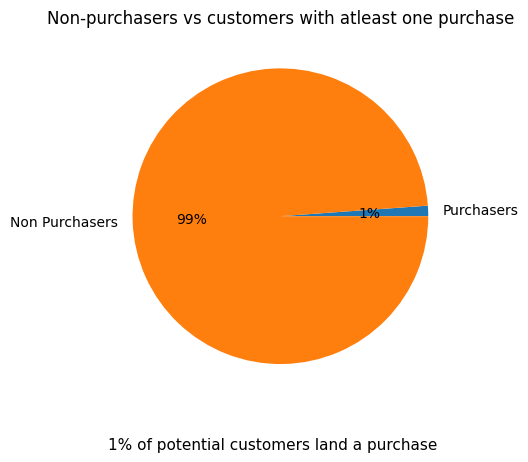

In [53]:
data = [num_purchasers, num_non_purchasers]
labels = ['Purchasers', 'Non Purchasers']
fig = plt.figure()
plt.figtext(0.5, 0.01, '1% of potential customers land a purchase', wrap=True, horizontalalignment='center', fontsize=11)
plt.title('Non-purchasers vs customers with atleast one purchase')
plt.pie(x=data, labels=labels, autopct='%.0f%%');

In [57]:
num_purchase_events = len(df[df['target'] == 1])
num_non_purchase_events = len(df) - num_purchase_events

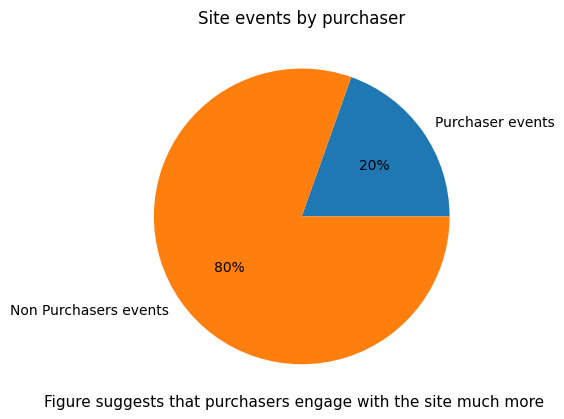

In [67]:
data = [num_purchase_events, num_non_purchase_events]
labels = ['Purchaser events', 'Non Purchasers events']
fig = plt.figure()
plt.figtext(0.5, 0.1, 'Figure suggests that purchasers engage with the site much more', wrap=True, horizontalalignment='center', fontsize=11)
plt.title('Site events by purchaser')
plt.pie(x=data, labels=labels, autopct='%.0f%%');

## Feature Analysis

**Event Features:**
- event_date: The date the event took place
- event_timestamp: The time the event took place
- event_name: The event that was triggered - Categorical

**Event Parameter Features:**
- event_params_page_title: The web page where the event took place - Categorical
- event_params_ga_session_number: *{THE NUMBER OF SESSIONS LINKED TO GOOGLE ACCOUNT????}*
- event_params_engaged_session_event: *{THE USER HAS ENGAGED WITH THE EVENT FOR X AMOUNT OF TIME????}*
- event_params_session_engaged: *{THE USER HAS ENGAGED WITH THE SESSION FOR X AMOUNT OF TIME????}*
- event_params_ga_session_id: The ID of the unique GA session
- event_params_engagement_time_msec: The length of time that the session has been engaged in milliseconds
- event_params_source: *{THE URL IN WHICH THE USER HAS ACCESSED THE STORE????}* - Categorical
- event_params_medium: *{THE MEDIUM IN WHICH THE USER HAS ACCESSED THE STORE????}* - Categorical
- event_params_outbound: The user has clicked an outbound link to an external site -- **CAN WE DROP**
- event_params_link_domain: *{THE SITE THE OUTBOUND LINK HAS TAKEN THE USER TO????}* - Categorical
- event_params_value: The unrounded value of the purchase -- **CAN WE DROP**

**User Features:**
- user_pseudo_id: The users ID tage, linked to cookies - Note! Safari users will have their cookies refreshed daily and hence user_pseudo_id will change
- user_first_touch_timestamp: The time that the users session started
- user_ltv_revenue: The lifetime revenue of the customer

**Device Features:**
- device_category: The device on which the user is accessing the store; desktop / mobile / tablet - Categorical
- device_mobile_brand_name: The brand name of the mobile device the user is accessing the store NEEDS INVESTIGATION -- CAN WE DROP - Categorical
- device_mobile_model_name: *{THE BROWSER USED BY THE MOBILE????}* NEEDS INVESTIGATION -- **CAN WE DROP** - Categorical
- device_operating_system: The operating system of the device accessing the store -- **CAN WE DROP** - Categorical
- device_language: The language used by the device accessing the store -- CAN WE DROP - Categorical
- device_web_info_browser: The browser used by the desktop device accessing the store -- **CAN WE DROP** - Categorical

**Geographical Features:**
**How much of this information is required**
- geo_continent: The continent on which the store is accessed - Categorical
- geo_sub_continent: The sub continent on which the store is accessed - Categorical
- geo_country: The country on which the store is accessed - Categorical
- geo_region: The country region on which the store is accessed - Categorical
- geo_city: The city on which the store is accessed - Categorical


**Traffic Features:**
- traffic_source_medium: *{THE MEDIUM IN WHICH THE STORE IS ACCESSED????}* - Categorical
- traffic_source_source: *{THE SOURCE IN WHICH THE STORE IS ACCESSED????}* - Categorical

**Ecommerce Features:**
- ecommerce_total_item_quantity: *{THE TOTAL NUMBER OF ITEMS VIEWED????}*
- ecommerce_unique_items: *{THE TOTAL NUMBER OF UNIQUE ITEMS VIEWED????}*

In [266]:
categorical_features = ['event_name',
                        'event_params_page_title',
                        'event_params_source',
                        'event_params_medium',
                        'event_params_link_domain',
                        'device_category',
                        'device_mobile_brand_name',
                        'device_mobile_model_name',
                        'device_operating_system',
                        'device_language',
                        'device_web_info_browser',
                        'geo_continent',
                        'geo_sub_continent',
                        'geo_country',
                        'geo_region',
                        'geo_city',
                        'traffic_source_medium',
                        'traffic_source_source']

In [267]:
df_categorical = df[categorical_features].copy()
df_categorical_ohe = df_categorical.copy()
df_categorical.head()

,event_name,event_params_page_title,event_params_source,event_params_medium,event_params_link_domain,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source
0,page_view,Drinkware | Lifestyle | Google Merchandise Store,NaN,NaN,NaN,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google
1,first_visit,Drinkware | Lifestyle | Google Merchandise Store,NaN,NaN,NaN,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google
2,user_engagement,Drinkware | Lifestyle | Google Merchandise Store,NaN,NaN,NaN,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google
3,session_start,Drinkware | Lifestyle | Google Merchandise Store,NaN,NaN,NaN,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google
4,user_engagement,Home,NaN,NaN,NaN,mobile,Samsung,<Other>,Android,en-us,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct)


### Event Name

- The event_name tells us which event is being triggered on the site.
- We can see clearly that purchasers spend more time engaging with pages on the site and viewing more items.
- They also spend more trigger more events linked to purchase such as checkout and adding of payment information.
- We need to be careful to purchase events as these are directly tied to a purchase.

In [177]:
df['event_name'].isna().sum()

0

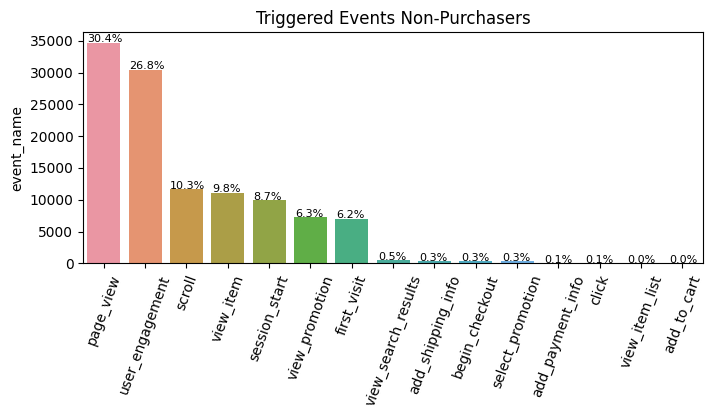

In [140]:
fig, ax = plt.subplots(figsize=(8,3))
plt.title('Triggered Events Non-Purchasers')
plt.ylabel('Event Count')
plt.xticks(rotation=70)
sns.barplot(x=df_non_purchasers['event_name'].value_counts().index,y=df_non_purchasers['event_name'].value_counts())

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_non_purchasers))
    x = p.get_x() * 1.005
    y = p.get_y() + p.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 8)

plt.show();

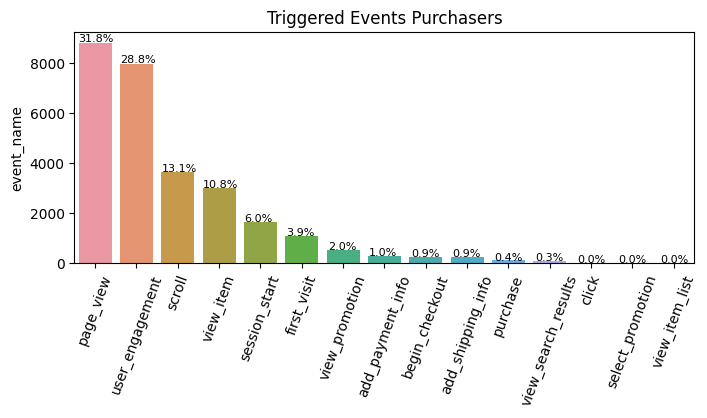

In [141]:
fig, ax = plt.subplots(figsize=(8,3))
plt.title('Triggered Events Purchasers')
plt.ylabel('Event Count')
plt.xticks(rotation=70)
sns.barplot(x=df_purchasers['event_name'].value_counts().index,y=df_purchasers['event_name'].value_counts())

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_purchasers))
    x = p.get_x() * 1.005
    y = p.get_y() + p.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 8)

plt.show();

In [154]:
set(df_purchasers['event_name'].unique())- set(df_non_purchasers['event_name'].unique())

{'purchase'}

### Pages Visited
* event_params_page_title tells us the pages that the customer has visited throughout their journey
* It is clear to see that non-purchasers spend more time on the Home page, whereas purchasers engage more with other pages
* There are no important pages unique to purchasers, a non-purchaser may visit the checkout page before backing out
* We have some null values in our dataset, we can impute these with the most frequent value which is likely to be the 'Home' page

In [178]:
df['event_params_page_title'].isna().sum()

311

In [184]:
df[df['event_params_page_title'].isna() == True]['event_name'].unique()

array(['scroll', 'page_view', 'user_engagement', 'view_item',
       'session_start', 'first_visit', 'view_promotion'], dtype=object)

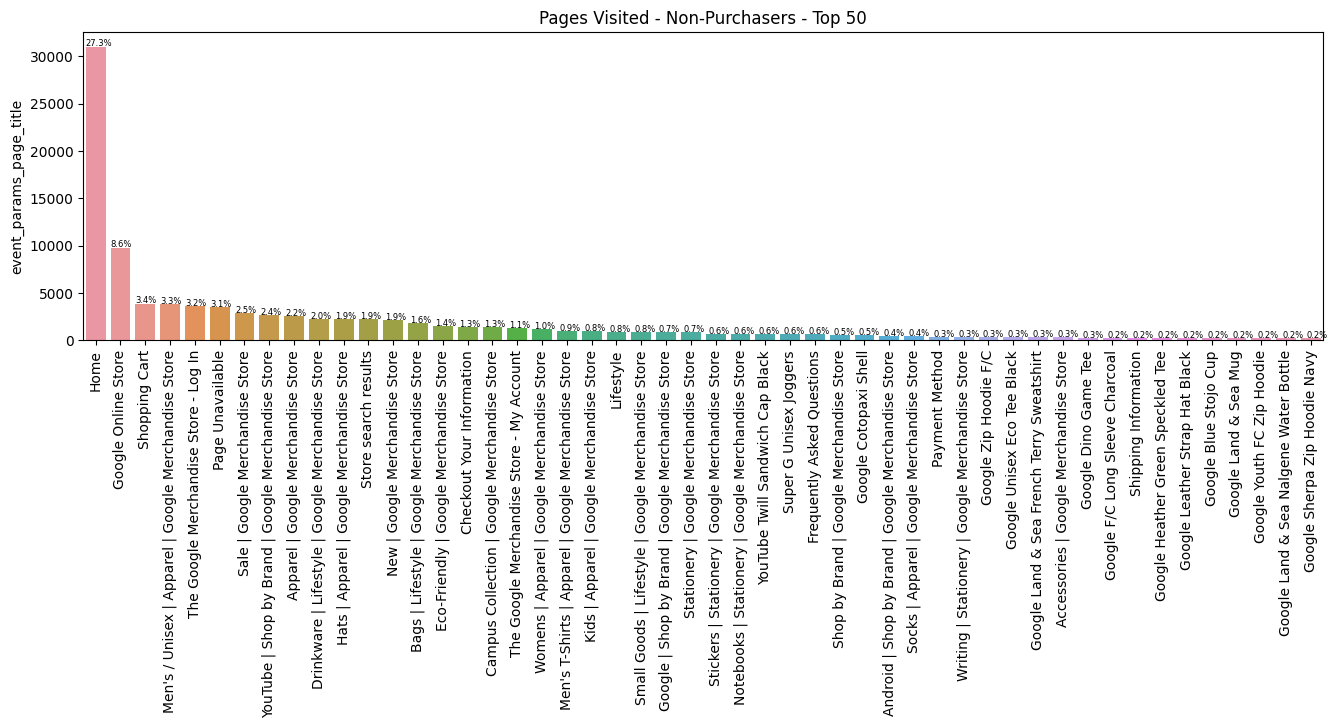

In [157]:
fig, ax = plt.subplots(figsize=(16,4))
plt.title('Pages Visited - Non-Purchasers - Top 50')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df_non_purchasers['event_params_page_title'].value_counts()[:50].index,y=df_non_purchasers['event_params_page_title'].value_counts()[:50])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_non_purchasers))
    x = p.get_x() * 1.005
    y = p.get_y() + p.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 6)

plt.show();

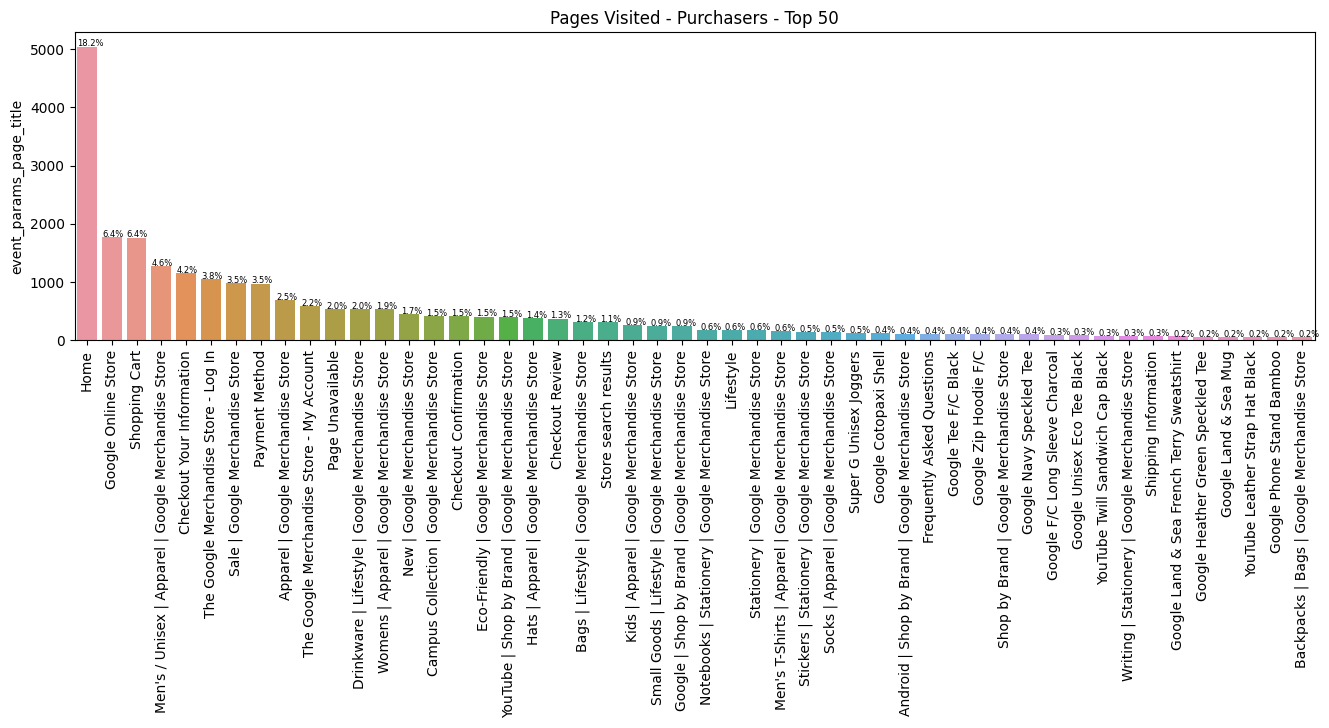

In [158]:
fig, ax = plt.subplots(figsize=(16,4))
plt.title('Pages Visited - Purchasers - Top 50')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df_purchasers['event_params_page_title'].value_counts()[:50].index,y=df_purchasers['event_params_page_title'].value_counts()[:50])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_purchasers))
    x = p.get_x() * 1.005
    y = p.get_y() + p.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 6)

plt.show();

In [155]:
set(df_purchasers['event_params_page_title'].unique())- set(df_non_purchasers['event_params_page_title'].unique())

{'#IamRemarkable Water Bottle',
 'Android Techie 3D Framed Art',
 'Google Beekeepers Youth Tee Pink',
 'Google Boulder Campus Ladies Tee',
 'Google Boulder Campus Mug',
 'Google Cambridge Campus Tote',
 'Google Chicago Campus Zip Hoodie',
 'Google Frisbee',
 'Google Light Pen Red',
 'Google Red YoYo',
 'Google Yellow YoYo',
 'Stan and Friends Youth Tee Green'}

### Param Source & Param Medium
- These features tell us at an event level the medium (organic / referral etc.) at which the user entered the site and the source url
- When working at a user level, this information will be inferred from other features, such as the traffic medium and the traffic source
- We are missing 69% of data here, I suggest that we drop the features

In [268]:
df_categorical.drop(['event_params_page_title','event_name'], axis=1, inplace=True)

In [270]:
df_categorical.drop(['event_params_source','event_params_medium'], axis=1, inplace=True)

In [271]:
df_categorical.head()

,event_params_link_domain,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source
0,NaN,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google
1,NaN,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google
2,NaN,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google
3,NaN,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google
4,NaN,mobile,Samsung,<Other>,Android,en-us,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct)


In [186]:
(df['event_params_source'].isna().sum() / len(df)) * 100

68.74027113463335

In [191]:
df[df['event_params_source'].isna() == True]['event_name'].unique()

array(['page_view', 'first_visit', 'user_engagement', 'session_start',
       'view_promotion', 'scroll', 'view_item', 'view_search_results',
       'begin_checkout', 'add_payment_info', 'add_shipping_info',
       'select_promotion', 'click', 'purchase', 'view_item_list',
       'add_to_cart'], dtype=object)

In [190]:
df[df['event_params_source'].isna() == False]['event_name'].unique()

array(['user_engagement', 'page_view', 'view_promotion', 'scroll',
       'view_item', 'begin_checkout', 'add_shipping_info',
       'view_search_results', 'click', 'select_promotion', 'purchase'],
      dtype=object)

In [172]:
df['event_params_source'].value_counts(normalize=True)

shop.googlemerchandisestore.com                                    0.533295608872793147625657184108
google                                                             0.186373924852874600643914959619
<Other>                                                            0.129787234042553184520940590119
(direct)                                                           0.095993662290629250266604799435
(data deleted)                                                     0.025441376188320506679385601956
googlemerchandisestore.com                                         0.016840199185151651095626590404
analytics.google.com                                               0.006926210955183340761687205145
support.google.com                                                 0.001109099139882299646028829265
Partners                                                           0.000792213671344499793629256867
sites.google.com                                                   0.000611136260751471275566581998


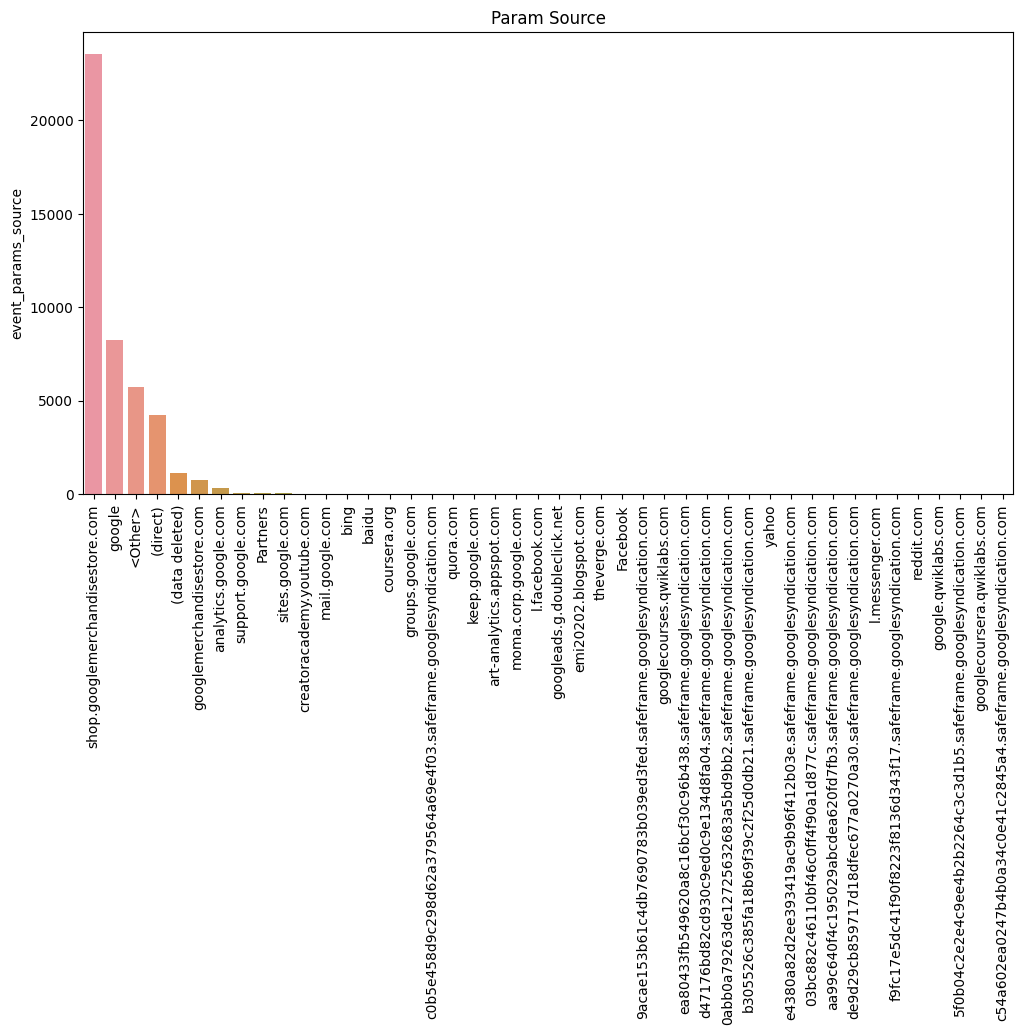

In [101]:
fig = plt.figure(figsize=(12,6))
plt.title('Param Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['event_params_source'].value_counts().index,y=df['event_params_source'].value_counts())
plt.show();

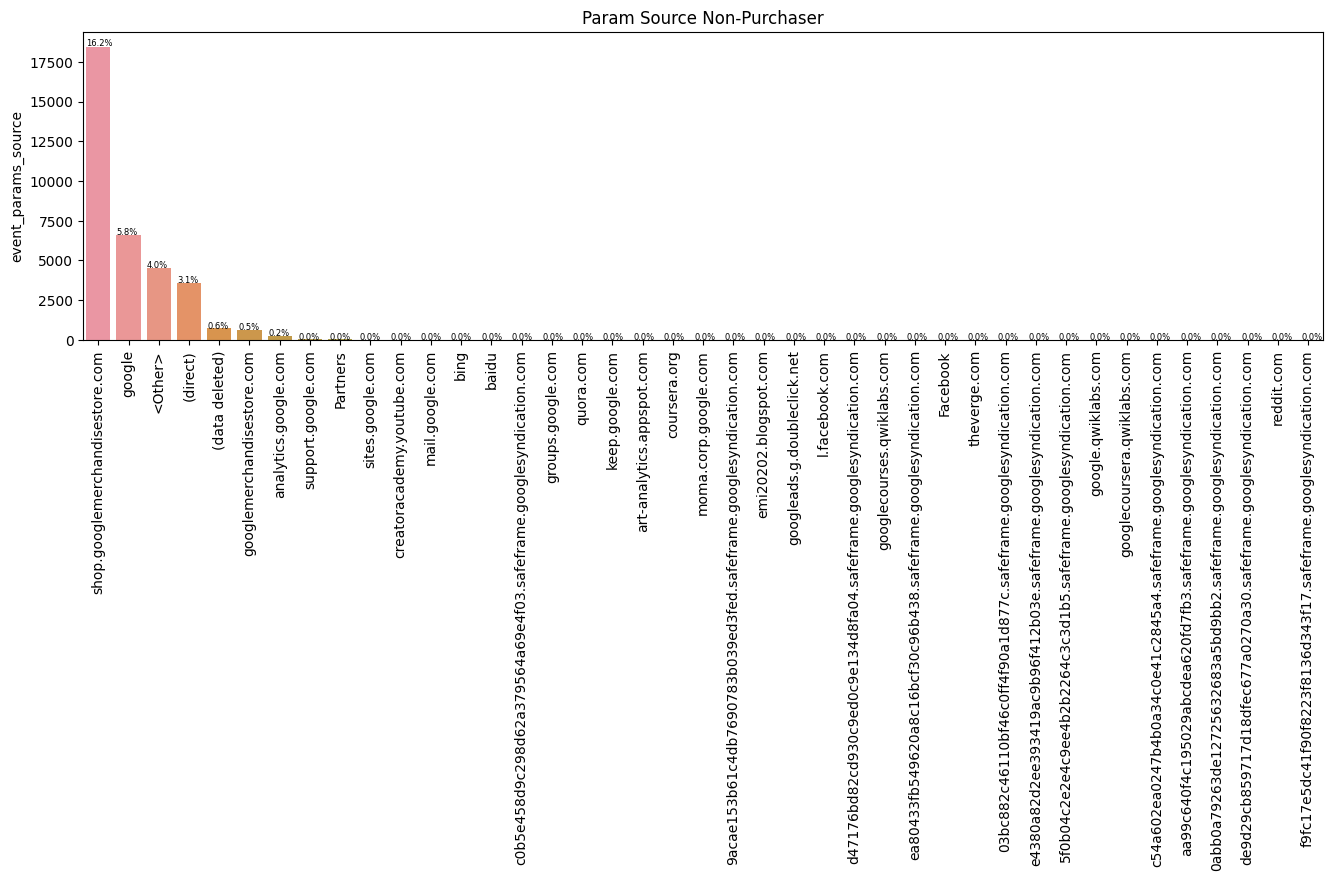

In [200]:
fig, ax = plt.subplots(figsize=(16,4))
plt.title('Param Source Non-Purchaser')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df_non_purchasers['event_params_source'].value_counts()[:50].index,y=df_non_purchasers['event_params_source'].value_counts()[:50])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_non_purchasers))
    x = p.get_x() * 1.005
    y = p.get_y() + p.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 6)

plt.show();

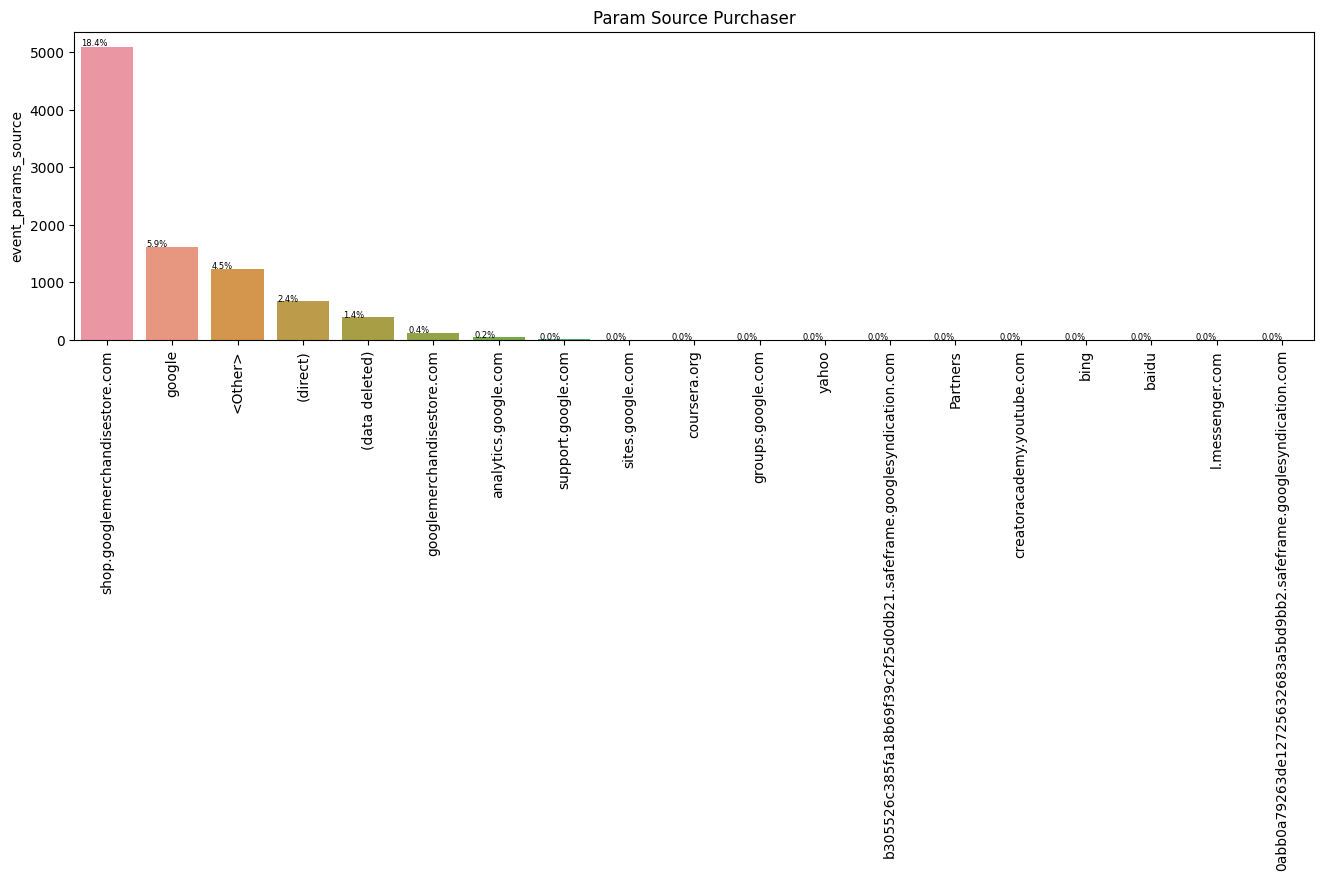

In [201]:
fig, ax = plt.subplots(figsize=(16,4))
plt.title('Param Source Purchaser')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df_purchasers['event_params_source'].value_counts()[:50].index,y=df_purchasers['event_params_source'].value_counts()[:50])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_purchasers))
    x = p.get_x() * 1.005
    y = p.get_y() + p.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 6)

plt.show();

In [166]:
set(df_purchasers['event_params_source'].unique())- set(df_non_purchasers['event_params_source'].unique())

{'b305526c385fa18b69f39c2f25d0db21.safeframe.googlesyndication.com',
 'l.messenger.com',
 'yahoo'}

### Param Medium

In [192]:
(df['event_params_medium'].isna().sum() / len(df)) * 100

68.37163558146774

In [194]:
df[df['event_params_medium'].isna() == True]['event_name'].unique()

array(['page_view', 'first_visit', 'user_engagement', 'session_start',
       'view_promotion', 'scroll', 'view_item', 'view_search_results',
       'begin_checkout', 'add_payment_info', 'add_shipping_info',
       'select_promotion', 'click', 'purchase', 'view_item_list',
       'add_to_cart'], dtype=object)

In [195]:
df[df['event_params_medium'].isna() == False]['event_name'].unique()

array(['user_engagement', 'page_view', 'view_promotion', 'scroll',
       'view_item', 'begin_checkout', 'add_shipping_info',
       'view_search_results', 'click', 'select_promotion', 'purchase'],
      dtype=object)

In [199]:
len(df[df['event_name']=='purchase'])

112

In [197]:
df[df['event_params_medium'].isna() == False]['event_params_source'].isna().sum()

521

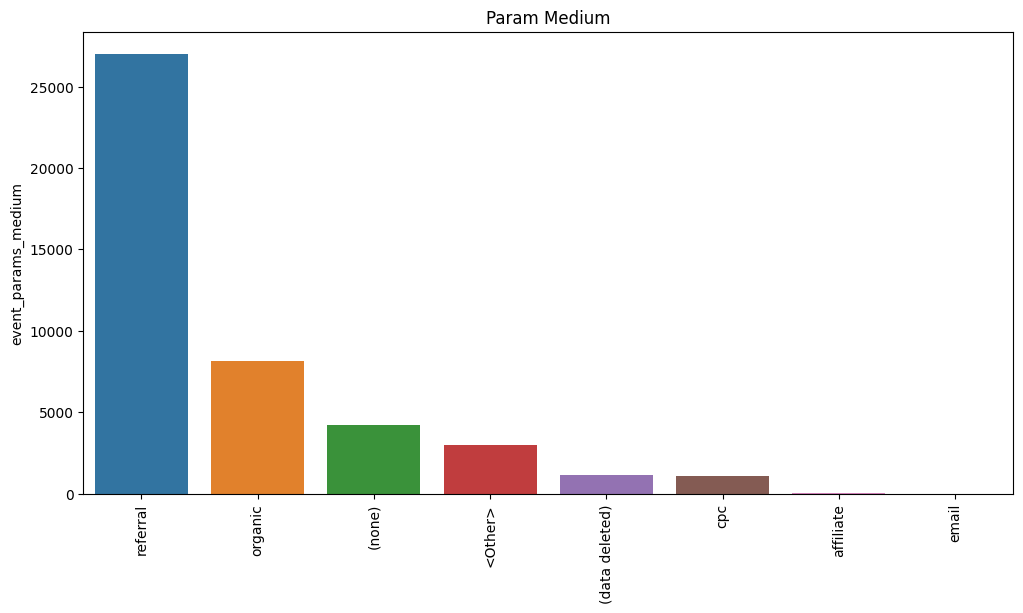

In [102]:
fig = plt.figure(figsize=(12,6))
plt.title('Param Medium')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['event_params_medium'].value_counts().index,y=df['event_params_medium'].value_counts())
plt.show();

In [202]:
df.drop(['event_params_source','event_params_medium'], axis=1, inplace=True)

### Link Domain
- This feature tells us the url a customer has transferred to when making an outbound click
- A very small proportion of events trigger this feature
- I suggest that we keep it as a yes / no outbound click

In [204]:
len(df[df['event_params_link_domain'].isna() == False])

79

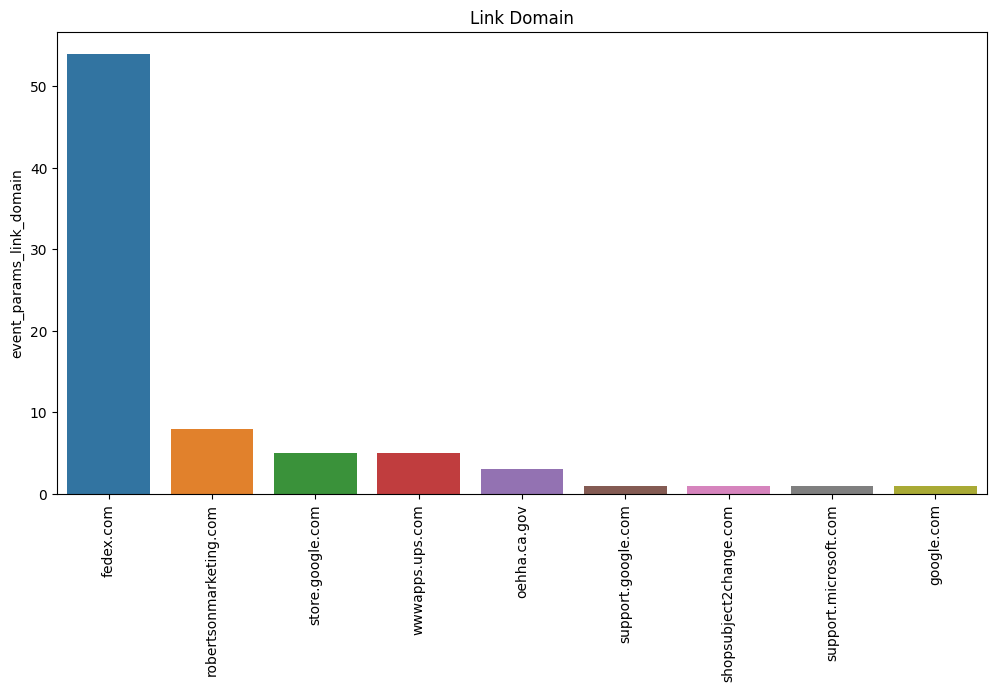

In [103]:
fig = plt.figure(figsize=(12,6))
plt.title('Link Domain')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['event_params_link_domain'].value_counts()[:50].index,y=df['event_params_link_domain'].value_counts()[:50])
plt.show();

In [272]:
df_categorical['outbound_click'] = (df_categorical['event_params_link_domain'].isna() == False) * 1
df_categorical.drop('event_params_link_domain', axis=1, inplace=True)
df_categorical.head()

,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,outbound_click
0,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
1,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
2,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
3,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
4,mobile,Samsung,<Other>,Android,en-us,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct),0


In [221]:
df.head(2)

,event_date,event_timestamp,event_name,user_pseudo_id,user_first_touch_timestamp,event_params_page_title,event_params_ga_session_number,event_params_engaged_session_event,event_params_session_engaged,event_params_ga_session_id,user_ltv_revenue,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,ecommerce_total_item_quantity,ecommerce_unique_items,event_params_engagement_time_msec,event_params_outbound,event_params_value,target,outbound_click
0,20201101,1604192073036492,page_view,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,0,0
1,20201101,1604192073036492,first_visit,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,0,0


### Device Category
- This feature will need to be One Hot Encoded
- Each user is linked to a single device category

In [84]:
df['device_category'].isna().sum()

0

In [30]:
mobile_count = len(df[df['device_category'] == 'mobile'])
desktop_count = len(df[df['device_category'] == 'desktop'])
tablet_count = len(df[df['device_category'] == 'tablet'])
print(f'{mobile_count} mobile users; {desktop_count} desktop users; {tablet_count} tablet users')

55260 mobile users; 83715 desktop users; 2357 tablet users


In [83]:
df.groupby('user_pseudo_id')['device_category'].nunique().unique()

array([1])

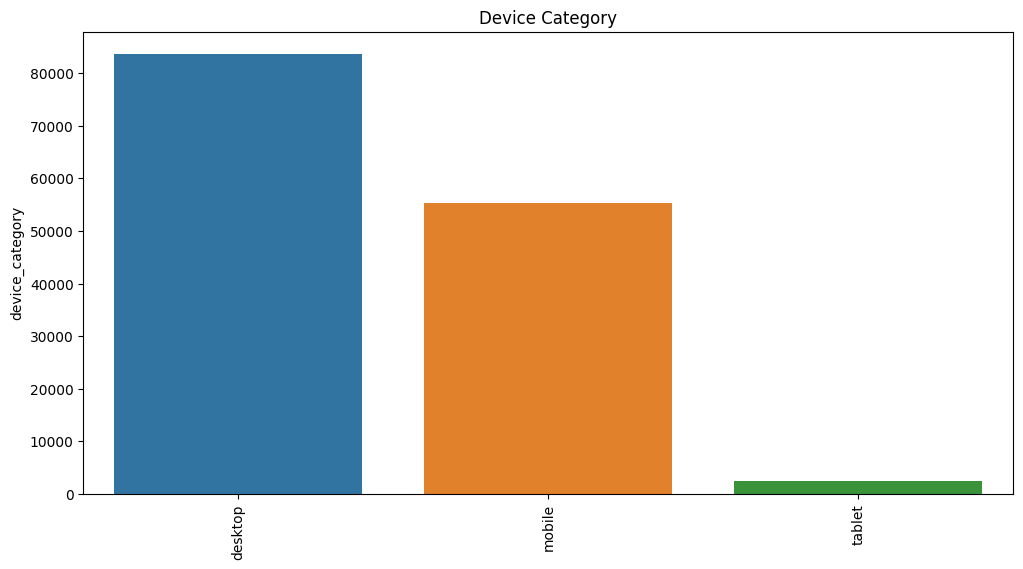

In [104]:
fig = plt.figure(figsize=(12,6))
plt.title('Device Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['device_category'].value_counts()[:50].index,y=df['device_category'].value_counts()[:50])
plt.show();

In [27]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
device_cat = df[['device_category']].copy()
device_cat

,device_category
0,desktop
1,desktop
2,desktop
3,desktop
4,mobile
...,...
61667,mobile
61668,desktop
61669,desktop
61670,desktop


In [28]:
enc_df = pd.DataFrame(enc.fit_transform(device_cat))
enc_df.columns = enc.categories_
enc_df.head()

,desktop,mobile,tablet
0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000
1,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000
2,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000
3,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000
4,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000


In [29]:
ohe_df = df.join(enc_df)
ohe_df.head()

,event_date,event_timestamp,event_name,user_pseudo_id,user_first_touch_timestamp,event_params_page_title,event_params_ga_session_number,event_params_engaged_session_event,event_params_session_engaged,event_params_ga_session_id,user_ltv_revenue,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,ecommerce_total_item_quantity,ecommerce_unique_items,event_params_engagement_time_msec,event_params_source,event_params_medium,event_params_outbound,event_params_link_domain,event_params_value,target,"(desktop,)","(mobile,)","(tablet,)"
0,20201101,1604192073036492,page_view,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000
0,20201102,1604340888557778,page_view,1001568.574699041200801730155944824219,1604340888557778.000000000000000000000000000000,Home,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,641557511.000000000000000000000000000000,0.000000000000000000000000000000,mobile,<Other>,<Other>,Web,en-us,Android Webview,Americas,Northern America,United States,California,Fremont,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000
0,20201103,1604407190165913,session_start,1001568.574699041200801730155944824219,1604340888557778.000000000000000000000000000000,Home,2.000000000000000000000000000000,NaN,NaN,892740370.000000000000000000000000000000,0.000000000000000000000000000000,mobile,<Other>,<Other>,Web,en-us,Android Webview,Americas,Northern America,United States,California,Fremont,(none),(direct),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000
1,20201101,1604192073036492,first_visit,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000
1,20201102,1604341115204117,user_engagement,1001568.574699041200801730155944824219,1604340888557778.000000000000000000000000000000,Home,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,641557511.000000000000000000000000000000,0.000000000000000000000000000000,mobile,<Other>,<Other>,Web,en-us,Android Webview,Americas,Northern America,United States,California,Fremont,organic,google,NaN,NaN,51124.000000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000


### Mobile Brand
- The brand of mobile device that the user is operating on
- This is populated for all users despite the majority of users operating on desktop
- We have one user than has operated on more than one mobile brand
- **DROP MOBILE BRAND AND MODEL**

In [273]:
df_categorical.drop(['device_mobile_brand_name','device_mobile_model_name'], axis=1, inplace=True)

In [274]:
df_categorical.head()

,device_category,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,outbound_click
0,desktop,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
1,desktop,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
2,desktop,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
3,desktop,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
4,mobile,Android,en-us,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct),0


In [85]:
df['device_mobile_brand_name'].isna().sum()

0

In [86]:
df.groupby('user_pseudo_id')['device_mobile_brand_name'].nunique().unique()

array([1, 2])

In [88]:
(df.groupby('user_pseudo_id')['device_mobile_brand_name'].nunique() > 1).sum()

1

In [92]:
desktop_count

83715

In [89]:
df['device_mobile_brand_name'].value_counts()

Apple        63042
Google       49202
<Other>      11113
Samsung       7994
Microsoft     3444
Xiaomi        3349
Huawei        1644
Mozilla       1544
Name: device_mobile_brand_name, dtype: int64

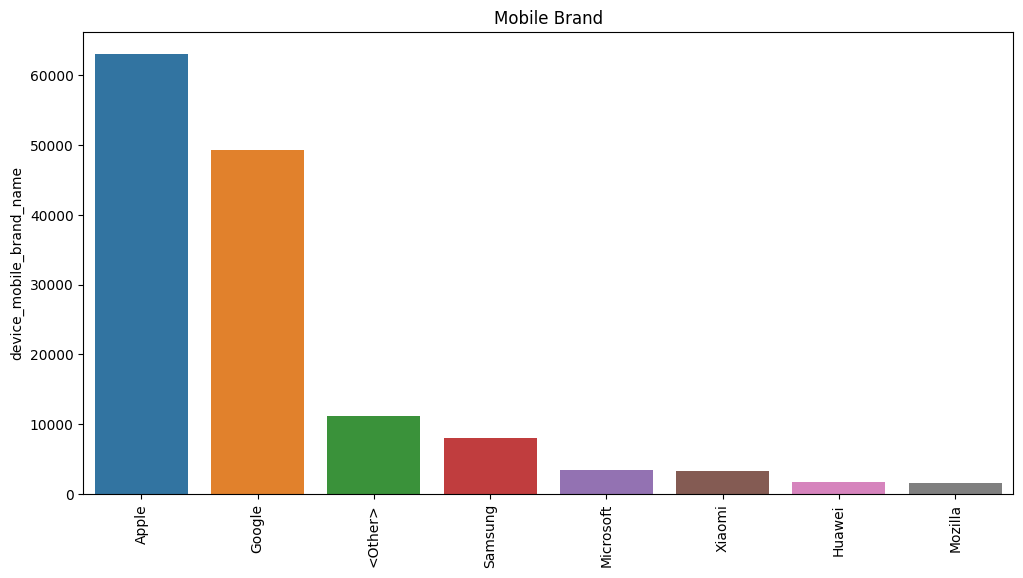

In [105]:
fig = plt.figure(figsize=(12,6))
plt.title('Mobile Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['device_mobile_brand_name'].value_counts()[:50].index,y=df['device_mobile_brand_name'].value_counts()[:50])
plt.show();

In [93]:
df['device_mobile_model_name'].isna().sum()

0

In [94]:
df.groupby('user_pseudo_id')['device_mobile_model_name'].nunique().unique()

array([1, 2])

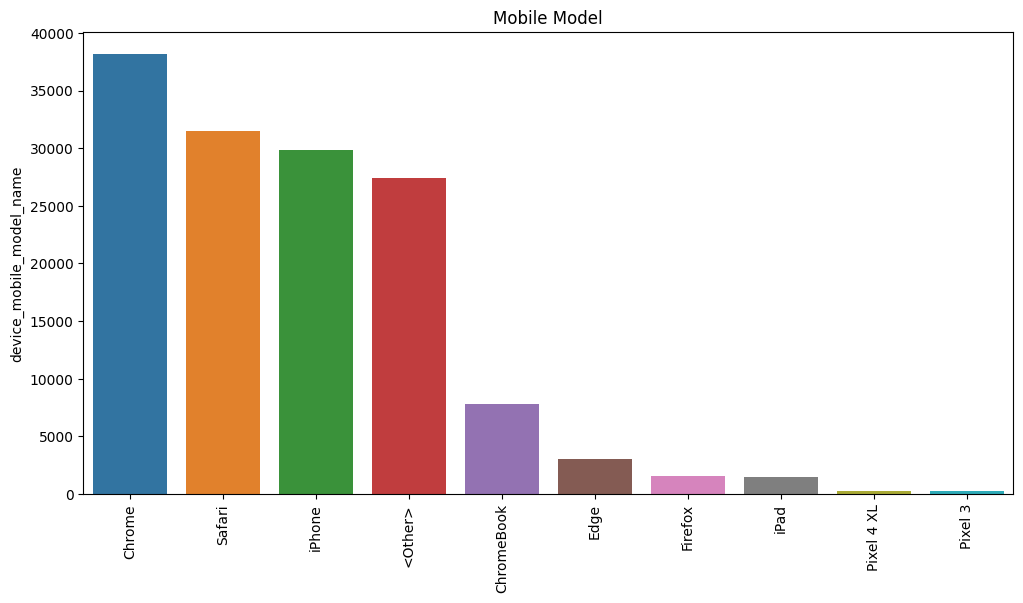

In [114]:
fig = plt.figure(figsize=(12,6))
plt.title('Mobile Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['device_mobile_model_name'].value_counts()[:50].index,y=df['device_mobile_model_name'].value_counts()[:50])
plt.show();

In [31]:
desktop_count

83715

### Device Operating System
- I believe this is users accessing the store via browser (either desktop / mobile or tablet) versus those that have accessed the store via the app (relevent system)
- OHE all of these

In [33]:
df['device_operating_system'].isna().sum()

0

In [32]:
len(df[df['device_operating_system'] == 'Web'])

83179

In [34]:
df['device_operating_system'].value_counts(normalize=True)

Web         0.588536212605779263107308452163
iOS         0.122576628081396993286134033951
Windows     0.103600033962584547886365271552
Macintosh   0.083080972462004354373021897118
Android     0.082557382616817137632736489650
<Other>     0.019648770271417655142176528216
Name: device_operating_system, dtype: float64

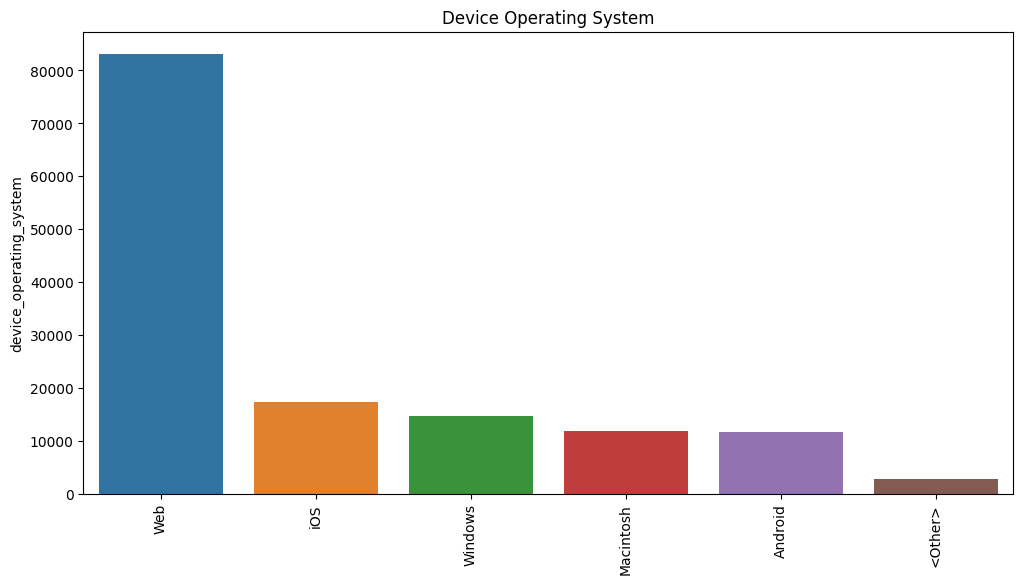

In [115]:
fig = plt.figure(figsize=(12,6))
plt.title('Device Operating System')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['device_operating_system'].value_counts()[:50].index,y=df['device_operating_system'].value_counts()[:50])
plt.show();

### Device Language
- The language the of the users device
- We have many variants of the same language i.e. en-us & en-gb
- Sites may not translate well into certain languages and may in turn effect purchase rate
- Group languages by their prefic and OHE
- We are missing 44% of data, will drop this

In [275]:
df_categorical.drop('device_language', axis=1, inplace=True)

In [131]:
df_categorical.head()

,device_category,device_operating_system,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,outbound_click
0,desktop,Web,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
1,desktop,Web,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
2,desktop,Web,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
3,desktop,Web,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
4,mobile,Android,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct),0


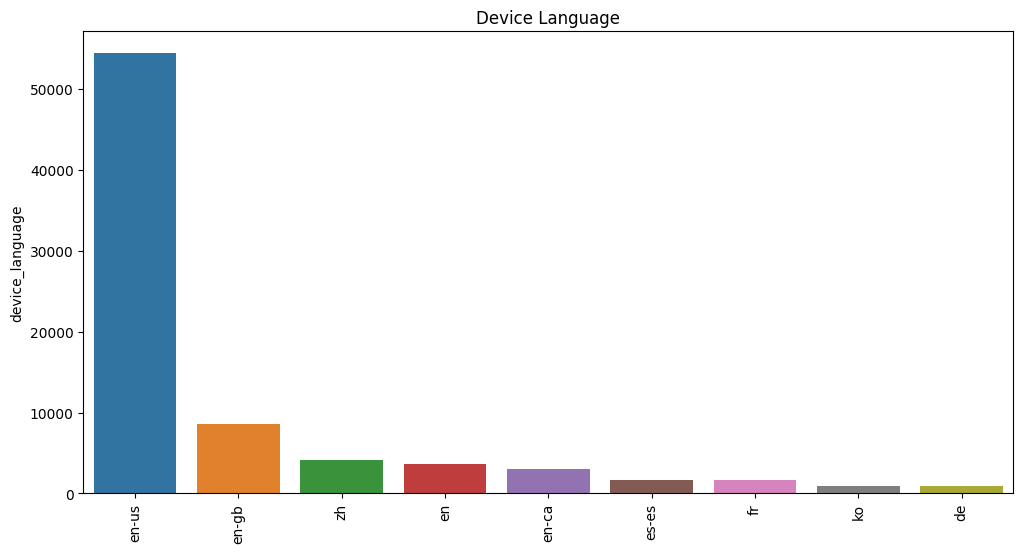

In [128]:
fig = plt.figure(figsize=(12,6))
plt.title('Device Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['device_language'].value_counts()[:50].index,y=df['device_language'].value_counts()[:50])
plt.show();

In [43]:
df['device_language'].unique()

array(['zh', 'en-us', nan, 'en', 'fr', 'de', 'en-gb', 'ko', 'es-es',
       'en-ca'], dtype=object)

In [129]:
df['device_language'].isna().sum()

62382

In [38]:
languages = df['device_language']

In [44]:
language_pfx = [x for x in languages]

In [45]:
language_pfx

['zh',
 'zh',
 'zh',
 'zh',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 nan,
 nan,
 nan,
 nan,
 nan,
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 'en-us',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '

In [36]:
df['language_pfx'] = None

### Web Browser

In [74]:
new_df = df['device_web_info_browser'].value_counts()

In [276]:
def series_other(series: pd.Series,
                 cut_off: int,
                 rename: str='Other') -> pd.Series:
    
    series = series.map(
        {**dict(zip(series.value_counts().index.tolist()[:cut_off],
                    series.value_counts().index.tolist()[:cut_off])),
        **dict.fromkeys(series.value_counts().index.tolist()[cut_off:],rename)}
    )
    
    return series

In [277]:
df_categorical['device_web_info_browser'] = series_other(df_categorical['device_web_info_browser'], 2, 'web_info_browser_other')
df_categorical['device_web_info_browser'].value_counts()

Chrome                    94891
Safari                    35966
web_info_browser_other    10475
Name: device_web_info_browser, dtype: int64

In [278]:
df_categorical.head()

,device_category,device_operating_system,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,outbound_click
0,desktop,Web,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
1,desktop,Web,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
2,desktop,Web,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
3,desktop,Web,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,0
4,mobile,Android,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct),0


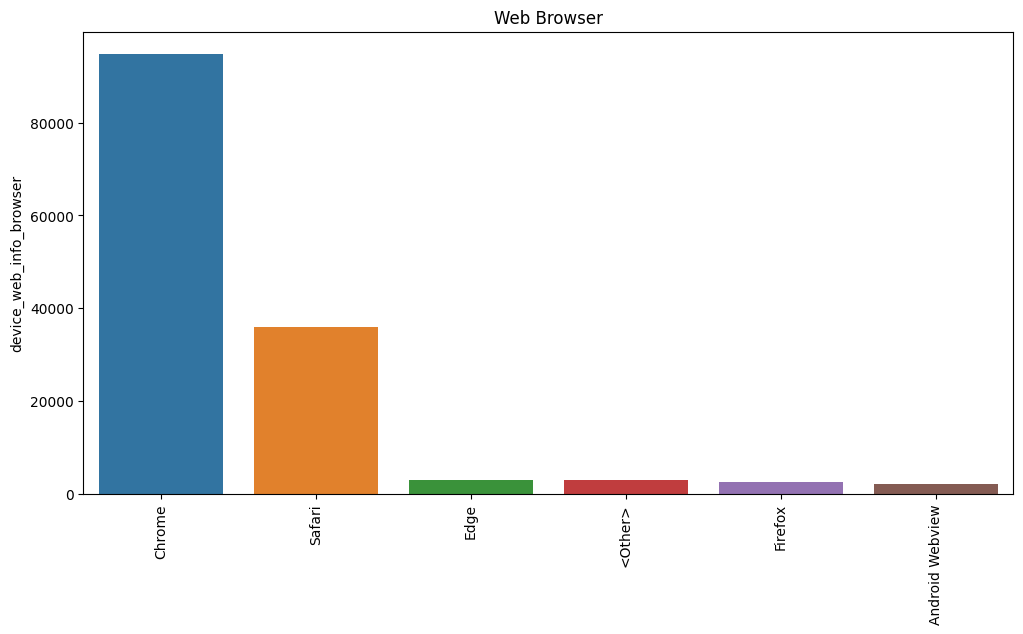

In [130]:
fig = plt.figure(figsize=(12,6))
plt.title('Web Browser')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['device_web_info_browser'].value_counts()[:50].index,y=df['device_web_info_browser'].value_counts()[:50])
plt.show();

### Geographical Features

We are going to drop Geographical Features & Keep the top 5 countries & Others

In [279]:
df_categorical.drop(['geo_continent','geo_sub_continent','geo_region','geo_city'], axis=1, inplace=True)

In [281]:
df_categorical['geo_country'] = series_other(df_categorical['geo_country'], 5, 'geo_country_other')
df_categorical['geo_country'].value_counts()

United States        63679
geo_country_other    48285
India                12963
Canada                8232
United Kingdom        4853
Japan                 3320
Name: geo_country, dtype: int64

In [326]:
df_categorical.drop('traffic_source_source', axis=1, inplace=True)
df_categorical.head()

,device_category,device_operating_system,device_web_info_browser,geo_country,traffic_source_medium,outbound_click
0,desktop,Web,Chrome,India,organic,0
1,desktop,Web,Chrome,India,organic,0
2,desktop,Web,Chrome,India,organic,0
3,desktop,Web,Chrome,India,organic,0
4,mobile,Android,Chrome,United States,(none),0


: 

In [283]:
df_categorical.head()

,device_category,device_operating_system,device_web_info_browser,geo_country,traffic_source_medium,traffic_source_source,outbound_click
0,desktop,Web,Chrome,India,organic,google,0
1,desktop,Web,Chrome,India,organic,google,0
2,desktop,Web,Chrome,India,organic,google,0
3,desktop,Web,Chrome,India,organic,google,0
4,mobile,Android,Chrome,United States,(none),(direct),0


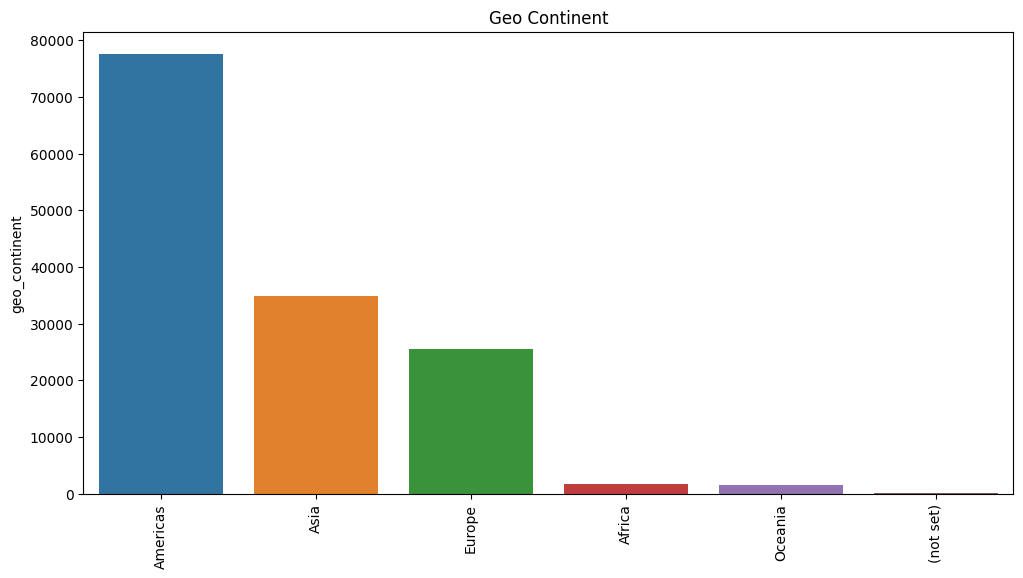

In [131]:
fig = plt.figure(figsize=(12,6))
plt.title('Geo Continent')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['geo_continent'].value_counts()[:50].index,y=df['geo_continent'].value_counts()[:50])
plt.show();

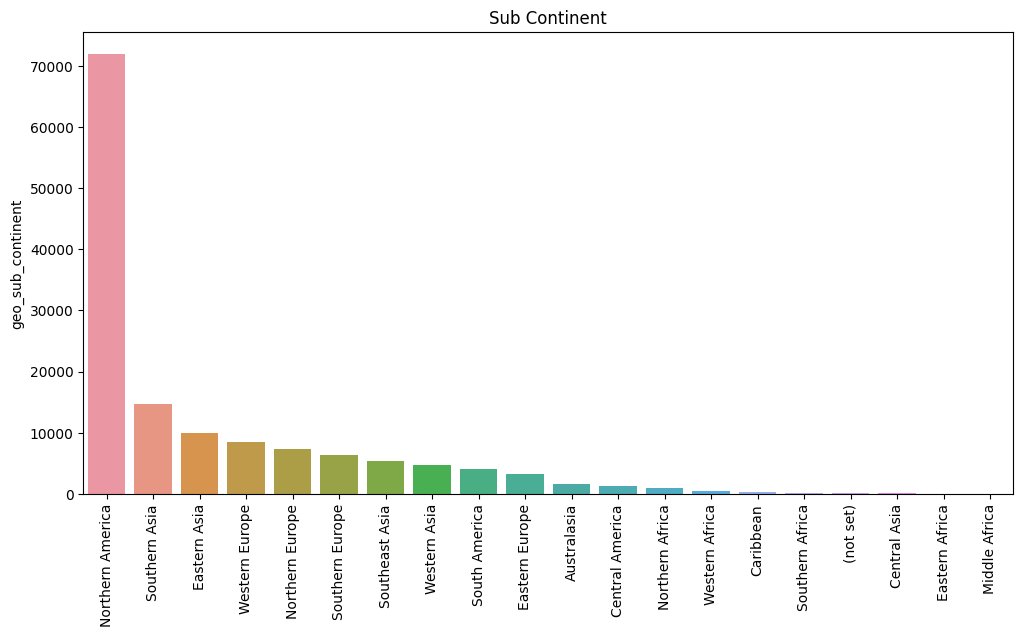

In [132]:
fig = plt.figure(figsize=(12,6))
plt.title('Sub Continent')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['geo_sub_continent'].value_counts()[:50].index,y=df['geo_sub_continent'].value_counts()[:50])
plt.show();

In [93]:
countries = df['geo_country'].value_counts().index[:5].tolist()
countries

['United States', 'India', 'Canada', 'United Kingdom', 'Japan']

In [95]:
new_feature = []

for country in df['geo_country'].tolist():
    if country in countries:
        new_feature.append(country)
    else:
        new_feature.append('Other')

In [97]:
df['country'] = new_feature
df['country'].value_counts()

United States     63679
Other             48285
India             12963
Canada             8232
United Kingdom     4853
Japan              3320
Name: country, dtype: int64

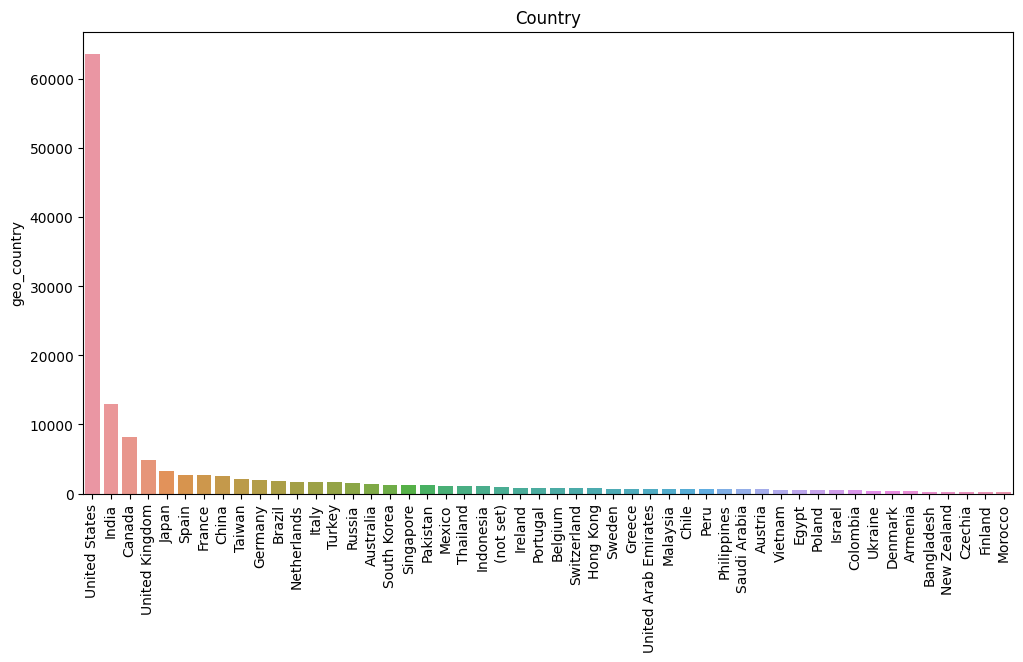

In [133]:
fig = plt.figure(figsize=(12,6))
plt.title('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['geo_country'].value_counts()[:50].index,y=df['geo_country'].value_counts()[:50])
plt.show();

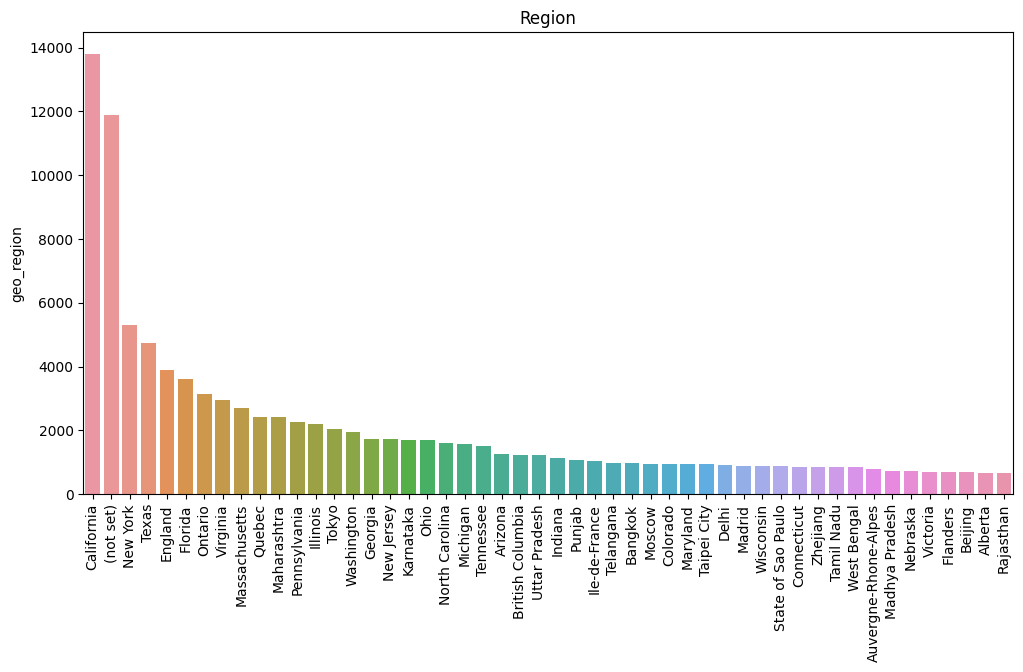

In [134]:
fig = plt.figure(figsize=(12,6))
plt.title('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['geo_region'].value_counts()[:50].index,y=df['geo_region'].value_counts()[:50])
plt.show();

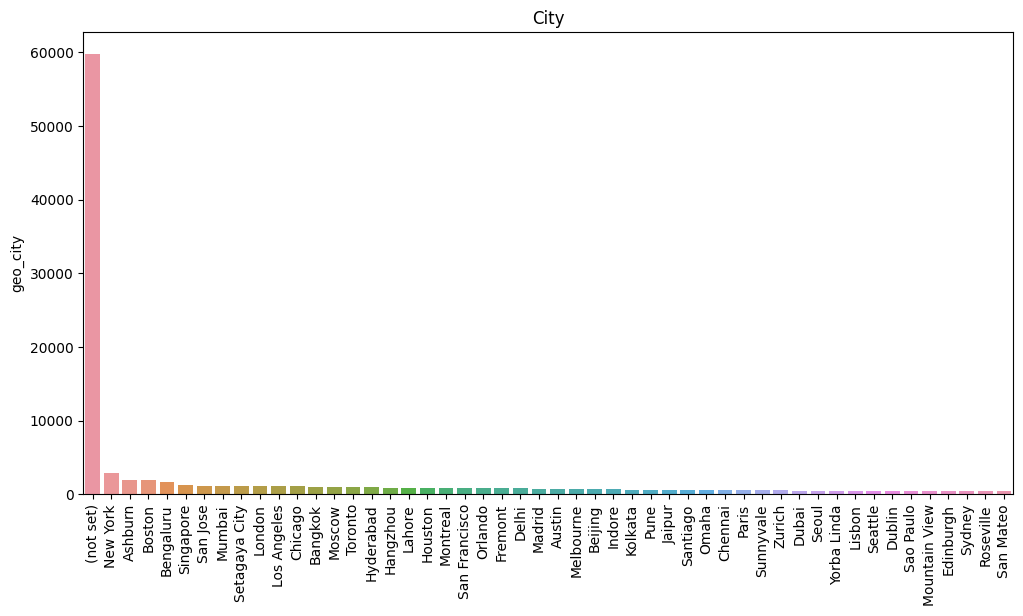

In [135]:
fig = plt.figure(figsize=(12,6))
plt.title('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['geo_city'].value_counts()[:50].index,y=df['geo_city'].value_counts()[:50])
plt.show();

In [98]:
df['traffic_source_medium'].isna().sum()

0

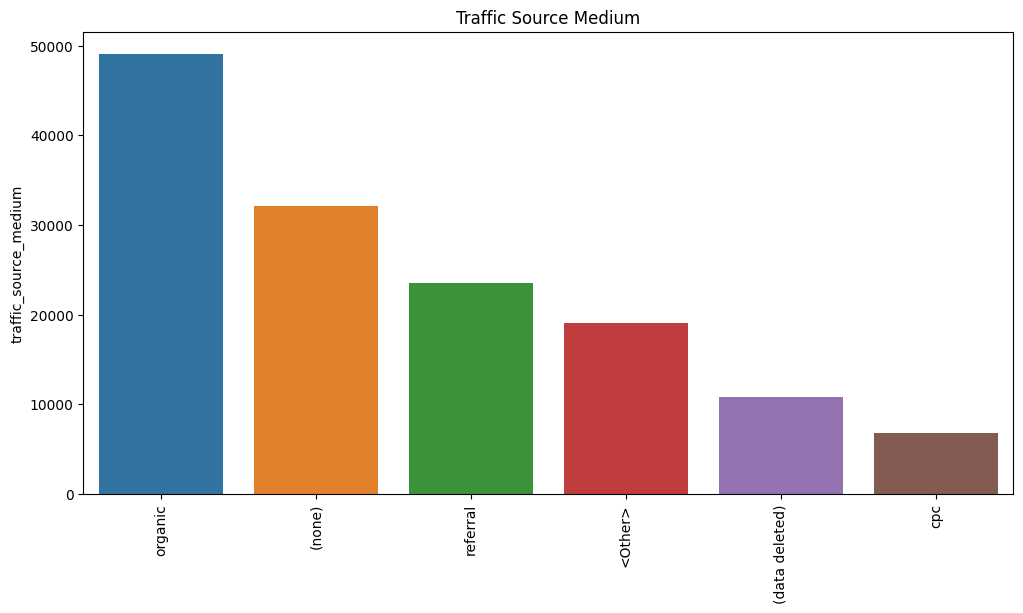

In [136]:
fig = plt.figure(figsize=(12,6))
plt.title('Traffic Source Medium')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['traffic_source_medium'].value_counts()[:50].index,y=df['traffic_source_medium'].value_counts()[:50])
plt.show();

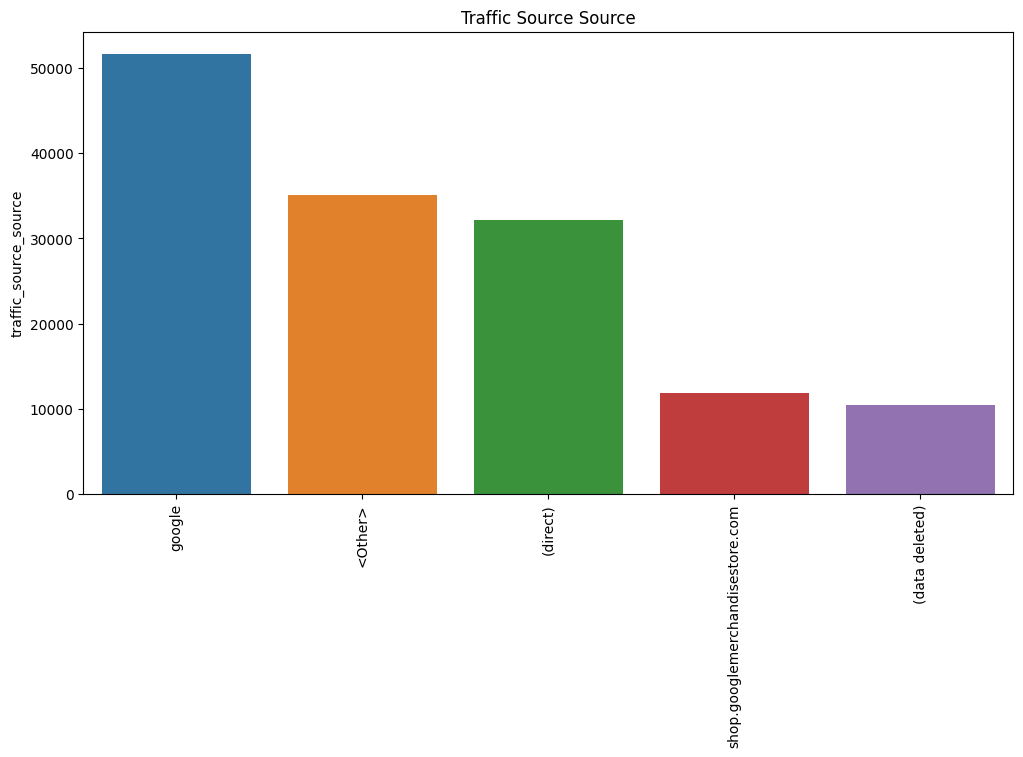

In [137]:
fig = plt.figure(figsize=(12,6))
plt.title('Traffic Source Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['traffic_source_source'].value_counts()[:50].index,y=df['traffic_source_source'].value_counts()[:50])
plt.show();

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Device Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.barplot(x=df['device_language'].value_counts()[:50].index,y=df['device_language'].value_counts()[:50])
plt.show();

## Initial Cleaning

## Exploratory Analysis

### Overview of event_name

In [14]:
df['event_name'].unique()

array(['page_view', 'first_visit', 'user_engagement', 'session_start',
       'view_promotion', 'scroll', 'view_item', 'view_search_results',
       'begin_checkout', 'add_payment_info', 'add_shipping_info',
       'select_promotion', 'click', 'purchase', 'view_item_list',
       'add_to_cart'], dtype=object)

In [15]:
df['event_name'].value_counts()

page_view              43396
user_engagement        38383
scroll                 15332
view_item              14105
session_start          11561
first_visit             8099
view_promotion          7746
view_search_results      643
begin_checkout           579
add_shipping_info        579
add_payment_info         379
select_promotion         319
purchase                 112
click                     79
view_item_list            16
add_to_cart                4
Name: event_name, dtype: int64

In [219]:
df_categorical.head()

,device_category,device_operating_system,device_web_info_browser,geo_country,traffic_source_medium,traffic_source_source,outbound_click
0,desktop,Web,Chrome,India,organic,google,0
1,desktop,Web,Chrome,India,organic,google,0
2,desktop,Web,Chrome,India,organic,google,0
3,desktop,Web,Chrome,India,organic,google,0
4,mobile,Android,Chrome,United States,(none),(direct),0


In [284]:
df_ohe = df_categorical.drop('outbound_click', axis=1)
df_ohe.head()

,device_category,device_operating_system,device_web_info_browser,geo_country,traffic_source_medium,traffic_source_source
0,desktop,Web,Chrome,India,organic,google
1,desktop,Web,Chrome,India,organic,google
2,desktop,Web,Chrome,India,organic,google
3,desktop,Web,Chrome,India,organic,google
4,mobile,Android,Chrome,United States,(none),(direct)


In [311]:
df_ohe.head()

,device_category,device_operating_system,device_web_info_browser,geo_country,traffic_source_medium,traffic_source_source
0,desktop,Web,Chrome,India,organic,google
1,desktop,Web,Chrome,India,organic,google
2,desktop,Web,Chrome,India,organic,google
3,desktop,Web,Chrome,India,organic,google
4,mobile,Android,Chrome,United States,(none),(direct)


In [285]:
df_ohe.isnull().sum()

device_category            0
device_operating_system    0
device_web_info_browser    0
geo_country                0
traffic_source_medium      0
traffic_source_source      0
dtype: int64

In [322]:
df_ohe.reset_index(inplace=True, drop=True)
df.reset_index(inplace=True, drop=True)

In [323]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=np.int8)
df_ohe_transformed = pd.DataFrame(ohe.fit_transform(df_ohe))

In [316]:
df_ohe_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [317]:
df.head()

,event_date,event_timestamp,event_name,user_pseudo_id,user_first_touch_timestamp,event_params_page_title,event_params_ga_session_number,event_params_engaged_session_event,event_params_session_engaged,event_params_ga_session_id,user_ltv_revenue,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,ecommerce_total_item_quantity,ecommerce_unique_items,event_params_engagement_time_msec,event_params_source,event_params_medium,event_params_outbound,event_params_link_domain,event_params_value,target
0,20201101,1604192073036492,page_view,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,20201101,1604192073036492,first_visit,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,20201101,1604192082302672,user_engagement,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,9215.000000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,0
3,20201101,1604192073036492,session_start,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,NaN,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,20201101,1604202750089608,user_engagement,1013442.500038762344047427177429199219,1604202743751333.000000000000000000000000000000,Home,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,1129172264.000000000000000000000000000000,0.000000000000000000000000000000,mobile,Samsung,<Other>,Android,en-us,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct),NaN,NaN,6268.000000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,0


In [324]:
df.merge(df_ohe_transformed, how='left', left_index=True, right_index=True)

,event_date,event_timestamp,event_name,user_pseudo_id,user_first_touch_timestamp,event_params_page_title,event_params_ga_session_number,event_params_engaged_session_event,event_params_session_engaged,event_params_ga_session_id,user_ltv_revenue,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,ecommerce_total_item_quantity,ecommerce_unique_items,event_params_engagement_time_msec,event_params_source,event_params_medium,event_params_outbound,event_params_link_domain,event_params_value,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,20201101,1604192073036492,page_view,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20201101,1604192073036492,first_visit,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20201101,1604192082302672,user_engagement,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,9215.000000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,20201101,1604192073036492,session_start,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,NaN,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,20201101,1604202750089608,user_engagement,1013442.500038762344047427177429199219,1604202743751333.000000000000000000000000000000,Home,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,1129172264.000000000000000000000000000000,0.000000000000000000000000000000,mobile,Samsung,<Other>,Android,en-us,Chrome,Americas,Northern America,United States,Washington,(not set),(none),(direct),NaN,NaN,6268.000000000000000000000000000000,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141327,20201103,1604425096793959,view_item,8732962051.300981521606445312500000000000,1604423873151538.000000000000000000000000000000,Hats | Apparel | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,1.000000000000000000000000000000,251007257.00000000000000000000000

In [287]:
df_ohe_transformed.columns = list(np.concatenate(ohe.categories_).flat)

In [309]:
df_ohe_transformed.reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000
1,1,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000
2,2,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000
3,3,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000
4,4,0.000000000000000000000000000000,1.000000000000000000000000000000,0.

In [310]:
df_ohe_transformed.join(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,event_date,event_timestamp,event_name,user_pseudo_id,user_first_touch_timestamp,event_params_page_title,event_params_ga_session_number,event_params_engaged_session_event,event_params_session_engaged,event_params_ga_session_id,user_ltv_revenue,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_language,device_web_info_browser,geo_continent,geo_sub_continent,geo_country,geo_region,geo_city,traffic_source_medium,traffic_source_source,ecommerce_total_item_quantity,ecommerce_unique_items,event_params_engagement_time_msec,event_params_source,event_params_medium,event_params_outbound,event_params_link_domain,event_params_value,target
0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,20201101.000000000000000000000000000000,1604192073036492.000000000000000000000000000000,page_view,1005694.583434840431436896324157714844,1604192073036492.000000000000000000000000000000,Drinkware | Lifestyle | Google Merchandise Store,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,4863244888.000000000000000000000000000000,0.000000000000000000000000000000,desktop,Google,Chrome,Web,zh,Chrome,Asia,Southern Asia,India,Delhi,Delhi,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000000000000000000000000000
0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,20201102.000000000000000000000000000000,1604340888557778.000000000000000000000000000000,page_view,1001568.574699041200801730155944824219,1604340888557778.000000000000000000000000000000,Home,1.000000000000000000000000000000,1.000000000000000000000000000000,0.000000000000000000000000000000,641557511.000000000000000000000000000000,0.000000000000000000000000000000,mobile,<Other>,<Other>,Web,en-us,Android Webview,Americas,Northern America,United States,California,Fremont,organic,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000000000000000000000000000
0,1.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,0.000000000000000000000000000000,1.000000000

In [300]:
df_ohe_transformed['outbound_click'] = df_categorical['outbound_click']
df_ohe_transformed.head()

/tmp/ipykernel_20815/3390222930.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df_ohe_transformed['outbound_click'] = df_categorical['outbound_click']


ValueError: cannot reindex on an axis with duplicate labels

In [301]:
df_ohe_transformed.columns.is_unique

True

In [302]:
df_ohe_transformed.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [305]:
df_ohe_transformed.index.is_unique

True

In [308]:
df_ohe_transformed.index.duplicated()

array([False, False, False, ..., False, False, False])